In [169]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [170]:
#Import .csv file and convert it to a DataFrame object
df = pd.read_csv(r"C:\Users\paidi\Downloads\Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [171]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
435    False
436    False
437    False
438    False
439    False
Length: 440, dtype: bool

In [172]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [173]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [174]:
print(df.columns)

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')


In [175]:
df.drop('Channel', axis=1, inplace=True, errors= 'ignore')
print(df)

     Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0         3  12669   9656     7561     214              2674        1338
1         3   7057   9810     9568    1762              3293        1776
2         3   6353   8808     7684    2405              3516        7844
3         3  13265   1196     4221    6404               507        1788
4         3  22615   5410     7198    3915              1777        5185
..      ...    ...    ...      ...     ...               ...         ...
435       3  29703  12051    16027   13135               182        2204
436       3  39228   1431      764    4510                93        2346
437       3  14531  15488    30243     437             14841        1867
438       3  10290   1981     2232    1038               168        2125
439       3   2787   1698     2510      65               477          52

[440 rows x 7 columns]


In [176]:
df

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,3,29703,12051,16027,13135,182,2204
436,3,39228,1431,764,4510,93,2346
437,3,14531,15488,30243,437,14841,1867
438,3,10290,1981,2232,1038,168,2125


In [177]:
df.info

<bound method DataFrame.info of      Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0         3  12669   9656     7561     214              2674        1338
1         3   7057   9810     9568    1762              3293        1776
2         3   6353   8808     7684    2405              3516        7844
3         3  13265   1196     4221    6404               507        1788
4         3  22615   5410     7198    3915              1777        5185
..      ...    ...    ...      ...     ...               ...         ...
435       3  29703  12051    16027   13135               182        2204
436       3  39228   1431      764    4510                93        2346
437       3  14531  15488    30243     437             14841        1867
438       3  10290   1981     2232    1038               168        2125
439       3   2787   1698     2510      65               477          52

[440 rows x 7 columns]>

In [178]:
from sklearn.preprocessing import MinMaxScaler
mxscaler=MinMaxScaler()
df_scaled=mxscaler.fit_transform(df)

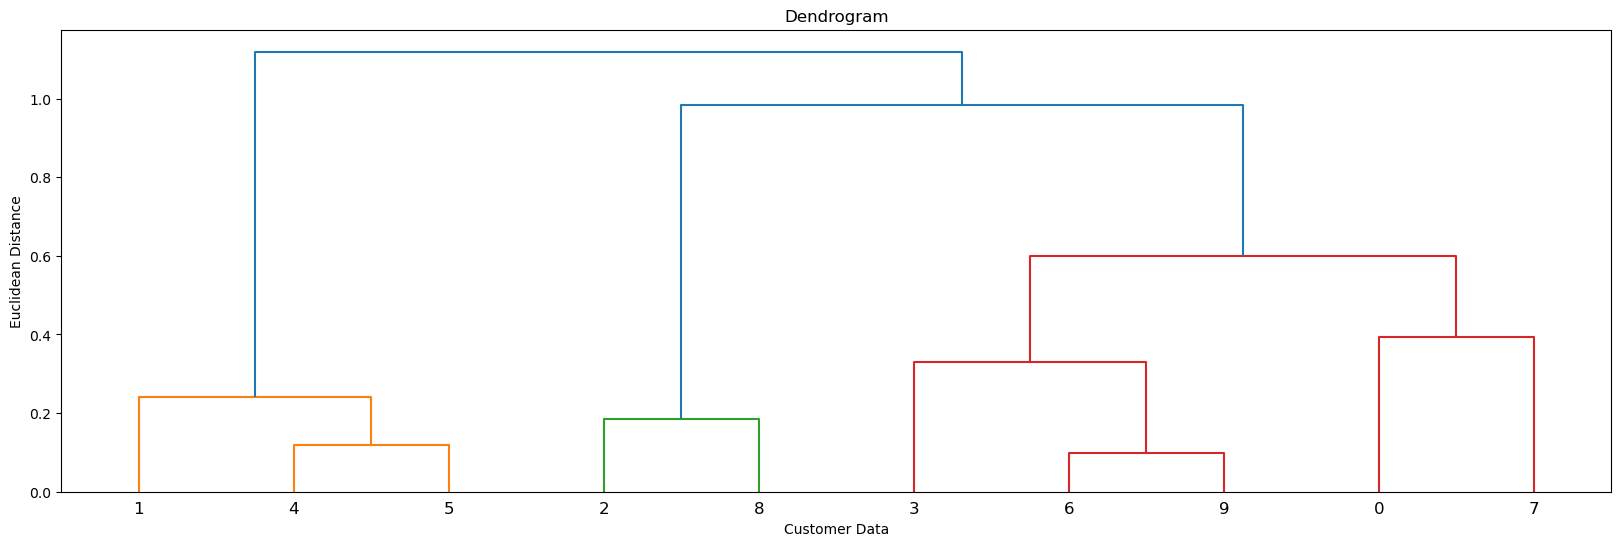

In [179]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import numpy as np

X = np.random.rand(10, 2)

plt.figure(figsize=(20,6))
dendo = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer Data')
plt.ylabel('Euclidean Distance')
plt.show()

#KMeans

In [181]:
X

array([[0.78953691, 0.44279321],
       [0.08760952, 0.88645518],
       [0.94167862, 0.88658802],
       [0.41795312, 0.74097205],
       [0.33586599, 0.98544471],
       [0.23293529, 0.9260247 ],
       [0.49265208, 0.48406151],
       [0.6106945 , 0.09101973],
       [0.77583904, 0.96716913],
       [0.4081978 , 0.43166369]])

In [182]:
import warnings 
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
wcss=[]
for i in range (2,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [183]:
wcss

[0.7587567933131018,
 0.29199000850077805,
 0.19318028915811236,
 0.1443969174037995,
 0.1068643985003144,
 0.028999803553273994,
 0.012001762686318137,
 0.004939029005417375,
 0.0]

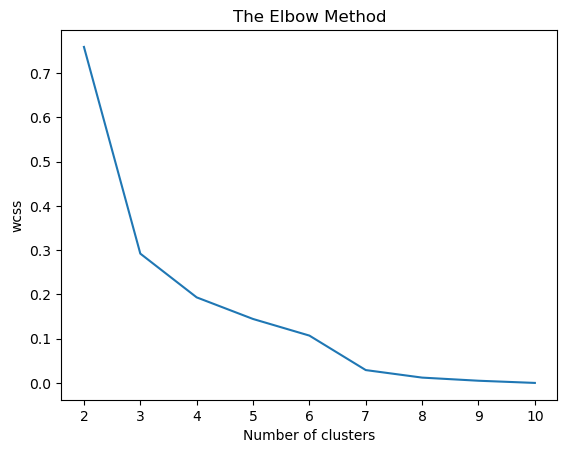

In [184]:
plt.plot(range(2,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [185]:
#Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[2 0 3 0 0 0 1 2 3 1]


In [186]:
type(groups)

numpy.ndarray

In [187]:
groups

array([3, 1, 6, 4, 7, 5, 2, 0, 4, 8])

In [188]:
groups.shape

(10,)

In [189]:
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185


In [190]:
df.head(3)

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844


In [191]:
group_num=pd.DataFrame(groups,columns=['Group'])
group_num

,Group
0,3
1,1
2,6
3,4
4,7
5,5
6,2
7,0
8,4
9,8


In [206]:
group_num=pd.DataFrame(groups,columns=['Group'])
group_num

,Group
0,3
1,1
2,6
3,4
4,7
5,5
6,2
7,0
8,4
9,8


In [208]:
df

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,3,29703,12051,16027,13135,182,2204
436,3,39228,1431,764,4510,93,2346
437,3,14531,15488,30243,437,14841,1867
438,3,10290,1981,2232,1038,168,2125


In [210]:
cust_Kmeans_data=pd.concat([df,group_num],axis=1)
cust_Kmeans_data

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,3,12669,9656,7561,214,2674,1338,3.0
1,3,7057,9810,9568,1762,3293,1776,1.0
2,3,6353,8808,7684,2405,3516,7844,6.0
3,3,13265,1196,4221,6404,507,1788,4.0
4,3,22615,5410,7198,3915,1777,5185,7.0
...,...,...,...,...,...,...,...,...
435,3,29703,12051,16027,13135,182,2204,NaN
436,3,39228,1431,764,4510,93,2346,NaN
437,3,14531,15488,30243,437,14841,1867,NaN
438,3,10290,1981,2232,1038,168,2125,NaN


In [228]:
cust_Kmeans_data[cust_Kmeans_data['Group'] == 4]

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
3,3,13265,1196,4221,6404,507,1788,4.0
8,3,5963,3648,6192,425,1716,750,4.0


In [240]:
# Model evaluation
from sklearn.metrics import silhouette_score
silhouette_score(X,groups)

-0.09553825029480698

In [249]:
np.round(silhouette_score(X,groups),2)

-0.1

In [256]:
from sklearn.cluster import DBSCAN